## **IMPORT LIBRARY**

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt


## **LOAD DATA**

In [ ]:
# Mount Google Drive to access files
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

# Correcting the file path by specifying the exact location of your file
file_path = '/content/gdrive/My Drive/Machine Learning/Week 6/Task 1/Online Retail.xlsx'

# Read the Excel file into a pandas DataFrame
df = pd.read_excel(file_path)
df = df.dropna(subset=["CustomerID"])
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]
ref_date = df["InvoiceDate"].max()

rfm = df.groupby("CustomerID").agg({
    "InvoiceDate": lambda x: (ref_date - x.max()).days,
    "InvoiceNo": "nunique",
    "TotalPrice": "sum"
}).reset_index()

rfm.columns = ["CustomerID", "Recency", "Frequency", "Monetary"]

Mounted at /content/gdrive


## **NORMALISASI**

In [ ]:
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[["Recency", "Frequency", "Monetary"]])

## **KMEANS CLUSTERING**

In [ ]:
inertia = []
sil_scores = []
ks = range(2, 11)

for k in ks:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    inertia.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(rfm_scaled, kmeans.labels_))

## **PLOT ELBOW & SILHOUETTE**

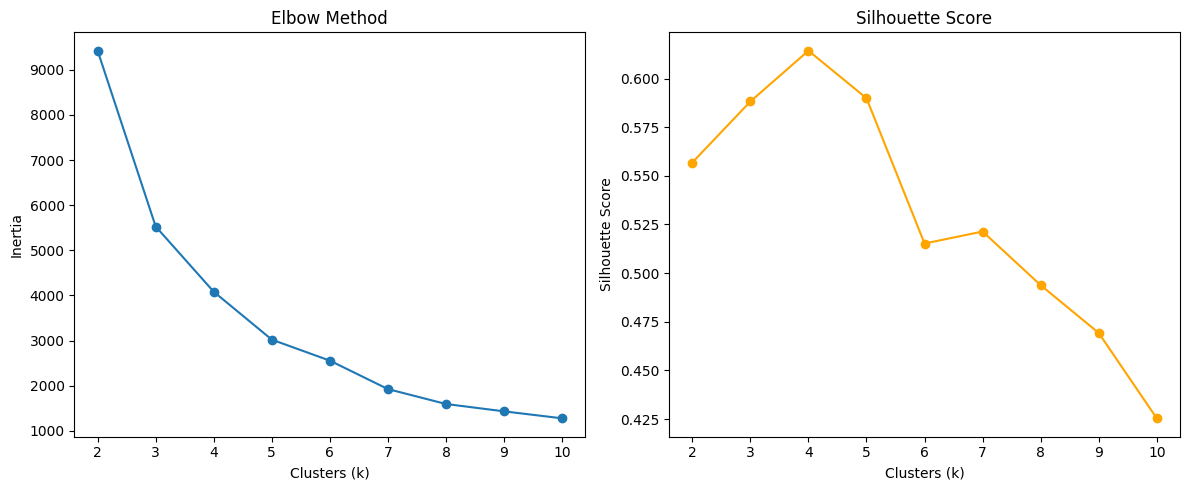

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(ks, inertia, marker='o')
plt.title("Elbow Method")
plt.xlabel("Clusters (k)")
plt.ylabel("Inertia")

plt.subplot(1, 2, 2)
plt.plot(ks, sil_scores, marker='o', color='orange')
plt.title("Silhouette Score")
plt.xlabel("Clusters (k)")
plt.ylabel("Silhouette Score")
plt.tight_layout()
plt.show()

# **KMeans**

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42).fit(rfm_scaled)
labels = kmeans.labels_
print("\nKMeans Metrics:")
print("Silhouette Score: {:.4f}".format(silhouette_score(rfm_scaled, labels)))
print("Calinski-Harabasz Index: {:.4f}".format(calinski_harabasz_score(rfm_scaled, labels)))
print("Davies-Bouldin Index: {:.4f}".format(davies_bouldin_score(rfm_scaled, labels)))


KMeans Metrics:
Silhouette Score: 0.5882
Calinski-Harabasz Index: 2999.2545
Davies-Bouldin Index: 0.7107


## **DBSCAN**

In [ ]:
dbscan = DBSCAN(eps=1.2, min_samples=5)
db_labels = dbscan.fit_predict(rfm_scaled)

if len(set(db_labels)) > 1:
    print("\nDBSCAN Metrics:")
    print("Silhouette Score: {:.4f}".format(silhouette_score(rfm_scaled, db_labels)))
    print("Calinski-Harabasz Index: {:.4f}".format(calinski_harabasz_score(rfm_scaled, db_labels)))
    print("Davies-Bouldin Index: {:.4f}".format(davies_bouldin_score(rfm_scaled, db_labels)))

else:
    print("\nDBSCAN hanya menghasilkan 1 cluster atau semuanya noise.")


DBSCAN Metrics:
Silhouette Score: 0.8872
Calinski-Harabasz Index: 1765.4322
Davies-Bouldin Index: 0.8017


# **Evaluasi Clustering: Rumus Metrik**

## **1. Silhouette Score**
Silhouette Score mengukur seberapa baik sebuah data berada di dalam klusternya dibandingkan dengan kluster lain.

\[
s(i) = \frac{b(i) - a(i)}{\max \{ a(i), b(i) \}}
\]

dengan:
- \( a(i) \): rata-rata jarak antara data \( i \) dan semua titik dalam kluster yang sama
- \( b(i) \): rata-rata jarak antara data \( i \) dan semua titik dalam kluster terdekat

---

## **2. Calinski-Harabasz Index (Variance Ratio Criterion)**

\[
\text{CH} = \frac{\text{Tr}(B_k)}{\text{Tr}(W_k)} \cdot \frac{n - k}{k - 1}
\]

dengan:
- \( \text{Tr}(B_k) \): trace dari matriks antar kluster
- \( \text{Tr}(W_k) \): trace dari matriks dalam kluster
- \( n \): jumlah total data
- \( k \): jumlah kluster

---

## **3. Davies-Bouldin Index**

\[
\text{DB} = \frac{1}{k} \sum_{i=1}^{k} \max_{j \ne i} \left( \frac{\sigma_i + \sigma_j}{d_{ij}} \right)
\]

dengan:
- \( \sigma_i \): rata-rata jarak titik-titik dalam kluster \( i \) terhadap centroid-nya
- \( d_{ij} \): jarak antara centroid kluster \( i \) dan \( j \)

Semakin kecil nilai DB Index, semakin baik pemisahan antar kluster.
